# Exploration

### This section will explore our data. It calls on use of our prior acquire and prep functions

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

from datetime import timedelta, datetime
import itertools
from sklearn.model_selection import TimeSeriesSplit

import acquire
import prep

import warnings
warnings.filterwarnings("ignore")

## Store Item Database

Using your store items data you prepped in lesson 2 exercises:


1.) Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.


2.) Validate your splits by plotting X_train and y_train.


3.) Plot the weekly average & the 7-day moving average. Compare the 2 plots.


4.) Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.


5.) Plot a time series decomposition.


6.) Create a lag plot (day over day).


7.) Run a lag correlation.

## - 1.) Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.


In [2]:
# acquire store data and combine into one dataframe
df = acquire.combine()

In [3]:
# prep dataframe with function from prep.py
df = prep.prep_store_data(df)

In [4]:
# aggregate to the daily level (resample('D').sum())
# reset index (we need the index to represent row numbers for this method of splitting)
# set sale_amount to y
# set sale_date to X

df2 = df.sale_amount.resample('D').sum().reset_index()
X = df2.sale_date
y = df2.sale_amount

In [5]:
# create TimeSeriesSplit to do 5 splits with no max train size. (Create the object)
# generate the indices for the splits using tss.split(X). (Fit to your data)
# use those indices to select the rows to go in their respective samples. (Transform your data)

tss = TimeSeriesSplit(n_splits=5, max_train_size=None)
for train_index, test_index in tss.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

#### The split is creating 5 train/test splits across our dataframe. The train test size grows each time and the test size remains the same.

#### The loop function assign variables X_train, y_train, X_test, and y_test to the splits and overwrites the variable each time. As a result, our variables are assigned to the last and largest split. 

## - 2.) Validate your splits by plotting X_train and y_train.

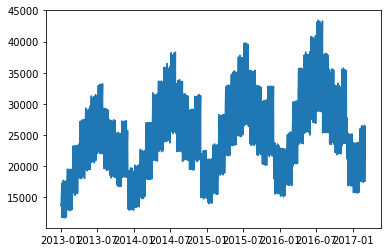

In [6]:
plt.plot(X_train, y_train)

## - 3.) Plot the weekly average & the 7-day moving average. Compare the 2 plots.

In [7]:
train = pd.DataFrame()

In [8]:
train['sale_date'] = X_train

In [9]:
train['sale_amount'] = y_train

In [10]:
train = train.sort_values('sale_date').set_index('sale_date')

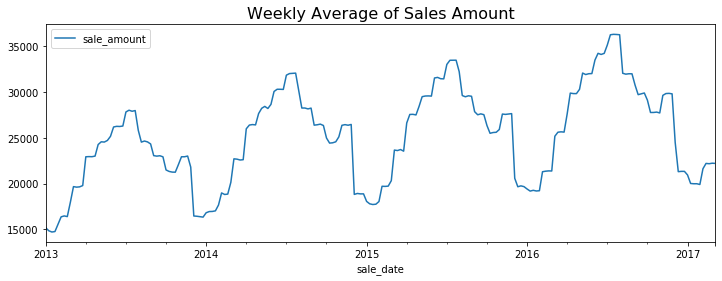

In [11]:
fig_1 = train.resample('W').mean().plot(figsize=(12, 4))
fig_1.set_title('Weekly Average of Sales Amount', fontsize=16)
plt.show()

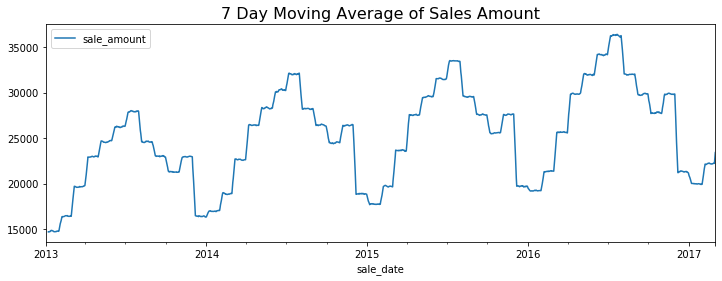

In [12]:
fig_2 = train.rolling(7).mean().plot(figsize=(12, 4))
fig_2.set_title('7 Day Moving Average of Sales Amount', fontsize=16)
plt.show()

## - 4.) Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

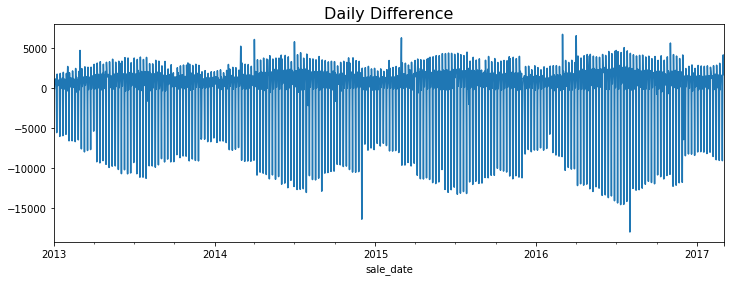

In [13]:
fig_3 = train.sale_amount.diff(periods=1).plot(figsize=(12,4))
fig_3.set_title('Daily Difference', fontsize=16)
plt.show()

## - 5.) Plot a time series decomposition.

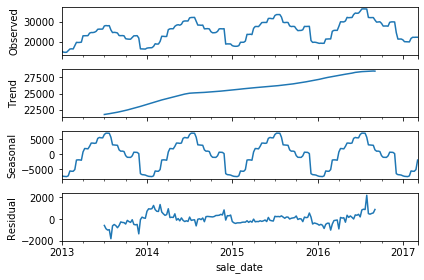

In [14]:
decomposition = sm.tsa.seasonal_decompose(train.resample('W').mean(), model='additive')

fig = decomposition.plot()
plt.show()

## - 6.) Create a lag plot (day over day).

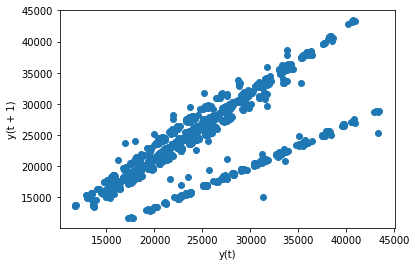

In [15]:
pd.plotting.lag_plot(train.resample('D').mean(), lag=1)

## - 7.) Run a lag correlation.

In [16]:
df_corr = pd.concat([train.shift(1), train], axis=1)
df_corr.columns = ['t-1','t+1']
result = df_corr.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.749048
t+1  0.749048  1.000000


## OPS Database

Using your OPS data you prepped in lesson 2 exercises:

1.) Split your data into train and test using the percent cutoff method.


2.) Validate your splits by plotting X_train and y_train.


3.) Plot the weekly average & the 7-day moving average. Compare the 2 plots.


4.) Group the electricity consumption time series by month of year, to explore annual seasonality.


5.) Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.


6.) Plot a time series decomposition. Takeaways?

## - 1.) Split your data into train and test using the percent cutoff method.

In [17]:
df = acquire.get_opsd_data()

In [18]:
df.shape

(4383, 5)

In [19]:
df['date'] = pd.to_datetime(df['Date'])
df = df.set_index('date').resample('D').sum()

In [20]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0
2006-01-04,1457.217,0.0,0.0,0.0
2006-01-05,1477.131,0.0,0.0,0.0


In [21]:
train_size = int(len(df)*.70)
train, test = df[:train_size], df[train_size:]

In [22]:
# check length of train and test
len(train), len(test)

(3068, 1315)

In [23]:
# verify train is 70% of data
len(train) / (len(train) + len(test))

0.6999771845767739

## - 2.) Validate your splits by plotting X_train and y_train.

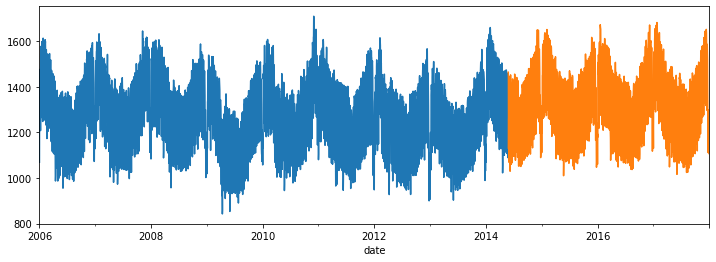

In [24]:
train.Consumption.plot(figsize=(12,4))
test.Consumption.plot(figsize=(12,4))

## - 3.) Plot the weekly average & the 7-day moving average. Compare the 2 plots.

Text(0.5, 1.0, 'Weekly Averages')

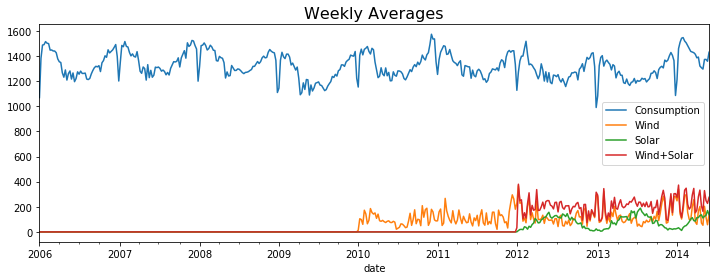

In [25]:
fig_4 = train.resample('W').mean().plot(figsize= (12,4))
fig_4.set_title('Weekly Averages', fontsize=16)

Text(0.5, 1.0, '7 Day Moving Average')

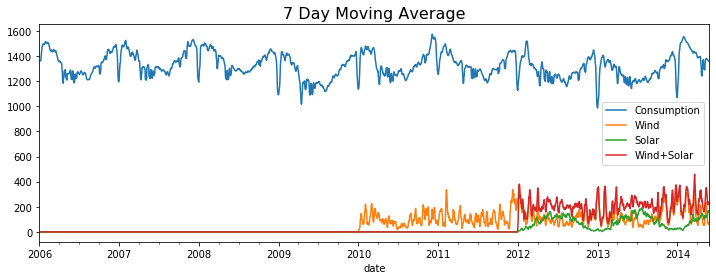

In [26]:
fig_5 = train.rolling(7).mean().plot(figsize=(12,4))
fig_5.set_title('7 Day Moving Average', fontsize=16)

## - 4.) Group the electricity consumption time series by month of year, to explore annual seasonality.


In [27]:
df['month'] = df.index.month

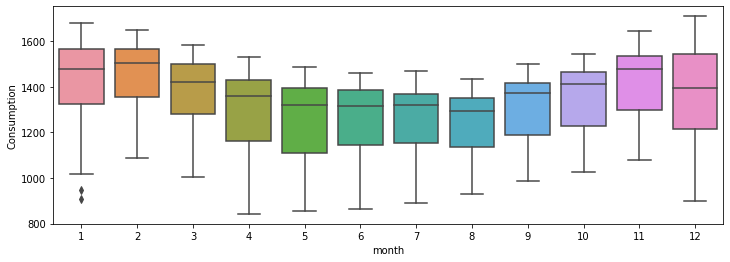

In [28]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='month', y='Consumption')

## - 5.) Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

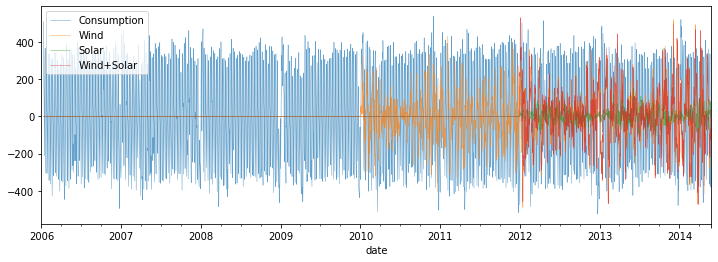

In [29]:
train.diff(periods=10).plot(figsize=(12,4), alpha= 0.7, linewidth = .5)

## - 6.) Plot a time series decomposition. Takeaways?

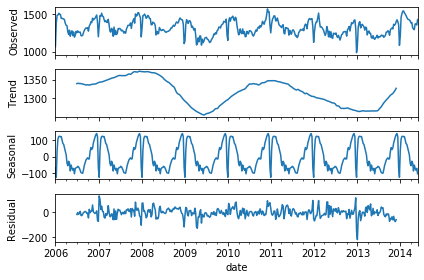

In [31]:
decomposition = sm.tsa.seasonal_decompose(train.Consumption.resample('W').mean(),model= 'additive')
decomposition.plot()
plt.show()